### Step 1: Importing the Relevant Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
sns.set_style('darkgrid')

### Step 2: Data Inspection

In [2]:
# Import the train & test data sets

train_data = pd.read_csv('train_F3fUq2S.csv')
test_data = pd.read_csv('test_Bk2wfZ3.csv')

train_data.head(5)

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,3,29,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,0,22,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,3,23,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,4,24,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,3,31,0,0,1,0,0,0,0,0,14,0.142826


In [3]:
test_data.head(5)

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,Noon,6,26,3,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,Morning,2,11,0,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,Evening,2,11,0,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,Evening,2,11,0,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,Noon,6,26,2,40,0,0,0,0,0,0,0,0,14


In [4]:
# Print the size & shape of given data

print(train_data.shape)
print(test_data.shape)

(1888, 22)
(762, 21)


In [5]:
# Check for data types of columns

train_data.dtypes

campaign_id             int64
sender                  int64
subject_len             int64
body_len                int64
mean_paragraph_len      int64
day_of_week             int64
is_weekend              int64
times_of_day           object
category                int64
product                 int64
no_of_CTA               int64
mean_CTA_len            int64
is_image                int64
is_personalised         int64
is_quote                int64
is_timer                int64
is_emoticons            int64
is_discount             int64
is_price                int64
is_urgency              int64
target_audience         int64
click_rate            float64
dtype: object

In [6]:
# No of unique values in each column

train_data.nunique()

campaign_id           1888
sender                  12
subject_len            170
body_len              1568
mean_paragraph_len     121
day_of_week              7
is_weekend               2
times_of_day             3
category                16
product                 43
no_of_CTA               40
mean_CTA_len            79
is_image                 6
is_personalised          2
is_quote                 7
is_timer                 1
is_emoticons             6
is_discount              2
is_price                 8
is_urgency               2
target_audience         17
click_rate            1810
dtype: int64

In [7]:
# Separate numerical & categorical columns

num_col = ['subject_len','body_len','mean_paragraph_len','no_of_CTA','mean_CTA_len','is_image','is_quote','is_emoticons']

cat_col = ['campaign_id','sender','day_of_week','is_weekend','times_of_day','category','product','is_personalised','is_timer',
           'is_discount','is_price','is_urgency','target_audience']
target_col = ['click_rate']


In [8]:
# Check the unique categories in each column

df_cat_types = pd.DataFrame(columns = ['column','train_categories','test_categories'])
for col in cat_col:
    new_row = pd.Series({'column': col, 'train_categories':str(train_data[col].unique()), 'test_categories':str(test_data[col].unique())})
    df_cat_types = df_cat_types.append(new_row, ignore_index=True)
    
df_cat_types

,column,train_categories,test_categories
0,campaign_id,[ 1 2 3 ... 1886 1887 1888],[1889 1890 1891 1892 1893 1894 1895 1896 1897 ...
1,sender,[ 3 10 0 2 14 12 15 7 11 9 1 6],[ 3 10 13 15 11 7 1 9 5 6 4 8]
2,day_of_week,[5 4 3 2 1 0 6],[6 5 4 3 1 0 2]
3,is_weekend,[1 0],[1 0]
4,times_of_day,['Noon' 'Morning' 'Evening'],['Noon' 'Morning' 'Evening']
5,category,[ 6 2 15 1 7 10 9 12 4 3 0 13 11 14 8 5],[ 6 2 15 1 10 9 3 4 12 7 0 13 11 5 8 14]
6,product,[26 11 9 10 5 13 12 6 1 31 27 42 34 23 19 ...,[26 11 9 5 13 42 10 12 6 31 1 34 43 23 22 ...
7,is_personalised,[0 1],[0 1]
8,is_timer,[0],[0]
9,is_discount,[0 1],[0 1]


In [9]:
# Some of the boolean flag columns seem to have unwanted values. So, let's check the distribution of those columns

train_data['is_price'].value_counts()

0        1875
5499        5
8000        2
5000        2
1399        1
1000        1
4999        1
14999       1
Name: is_price, dtype: int64

In [10]:
# Check for nulls and duplicates

# Display the results sorted by null percentage of total rows

train_null_perc = (train_data.isnull().sum() / len(train_data) * 100).sort_values(ascending=False)
train_null_perc

# There are no null values

click_rate            0.0
target_audience       0.0
sender                0.0
subject_len           0.0
body_len              0.0
mean_paragraph_len    0.0
day_of_week           0.0
is_weekend            0.0
times_of_day          0.0
category              0.0
product               0.0
no_of_CTA             0.0
mean_CTA_len          0.0
is_image              0.0
is_personalised       0.0
is_quote              0.0
is_timer              0.0
is_emoticons          0.0
is_discount           0.0
is_price              0.0
is_urgency            0.0
campaign_id           0.0
dtype: float64

In [11]:
test_null_perc = (test_data.isnull().sum() / len(test_data) * 100).sort_values(ascending=False)
test_null_perc

# There are no null values

target_audience       0.0
product               0.0
sender                0.0
subject_len           0.0
body_len              0.0
mean_paragraph_len    0.0
day_of_week           0.0
is_weekend            0.0
times_of_day          0.0
category              0.0
no_of_CTA             0.0
is_urgency            0.0
mean_CTA_len          0.0
is_image              0.0
is_personalised       0.0
is_quote              0.0
is_timer              0.0
is_emoticons          0.0
is_discount           0.0
is_price              0.0
campaign_id           0.0
dtype: float64

In [12]:
# CHECKING FOR DUPLICATES

print(train_data.duplicated().sum())
print(test_data.duplicated().sum())

# There are no duplicate rows in the dataset

0
0


### Step 3: Data Cleaning

In [13]:
# Seperate the data into features & target before beginning preprocessing steps

train_features = train_data.drop('click_rate', axis=1)
train_target = train_data['click_rate']

test_features = test_data.copy()

In [14]:
# There are no null values or duplicates in train/test set, so we don't need to do any imputation

### FEATURE ENGINEERING

In [15]:
# Dropping irrelevant columns

# Drop campaign_id (unique identifier)
train_features = train_features.drop('campaign_id', axis=1)
test_features = test_features.drop('campaign_id', axis=1)

# Drop is_timer (only "0" category)
train_features = train_features.drop('is_timer', axis=1)
test_features = test_features.drop('is_timer', axis=1)

# Remove from list
cat_col.remove('campaign_id')
cat_col.remove('is_timer')

# Transform 'is_price' to binary column (only 13 non zero values out of 1888)
train_features['is_price'] = [0 if x==0 else 1 for x in train_features['is_price']]
test_features['is_price'] = [0 if x==0 else 1 for x in test_features['is_price']]

# train_data.query('is_price !=0')

In [16]:
# Creating new features

train_features['total_CTA_len'] = train_features['no_of_CTA'] * train_features['mean_CTA_len']
test_features['total_CTA_len'] = test_features['no_of_CTA'] * test_features['mean_CTA_len']

train_features['no_of_para'] = train_features['body_len'] / train_features['mean_paragraph_len']
test_features['no_of_para'] = test_features['body_len'] / test_features['mean_paragraph_len']

train_features['mean_CTA_by_mean_para'] = train_features['mean_CTA_len'] / train_features['mean_paragraph_len']
test_features['mean_CTA_by_mean_para'] = test_features['mean_CTA_len'] / test_features['mean_paragraph_len']

In [17]:
# Generating polynomial features

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2, interaction_only=False)
list1_col = ['subject_len','body_len','mean_paragraph_len','no_of_CTA','mean_CTA_len']
poly_features_train = pd.DataFrame(poly.fit_transform(train_features[list1_col]))
poly_features_test = pd.DataFrame(poly.fit_transform(test_features[list1_col]))

# poly_features_train.loc[:,6:]

### Step 4: Exploratory Data Analysis

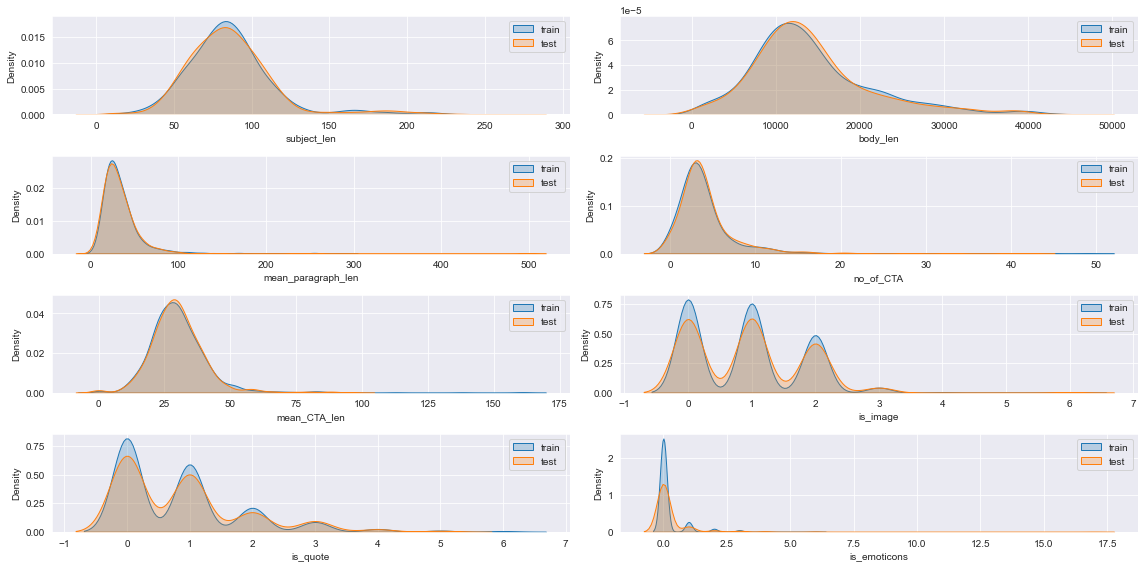

In [18]:
fig, axes = plt.subplots(4,2,figsize=(16,8))
for col, ax in zip(num_col, axes.flat):
    sns.kdeplot(train_data[col], shade=True, label='train', ax=ax)
    sns.kdeplot(test_data[col], shade=True, label='test', ax=ax)
    ax.legend()
plt.tight_layout()
plt.show()

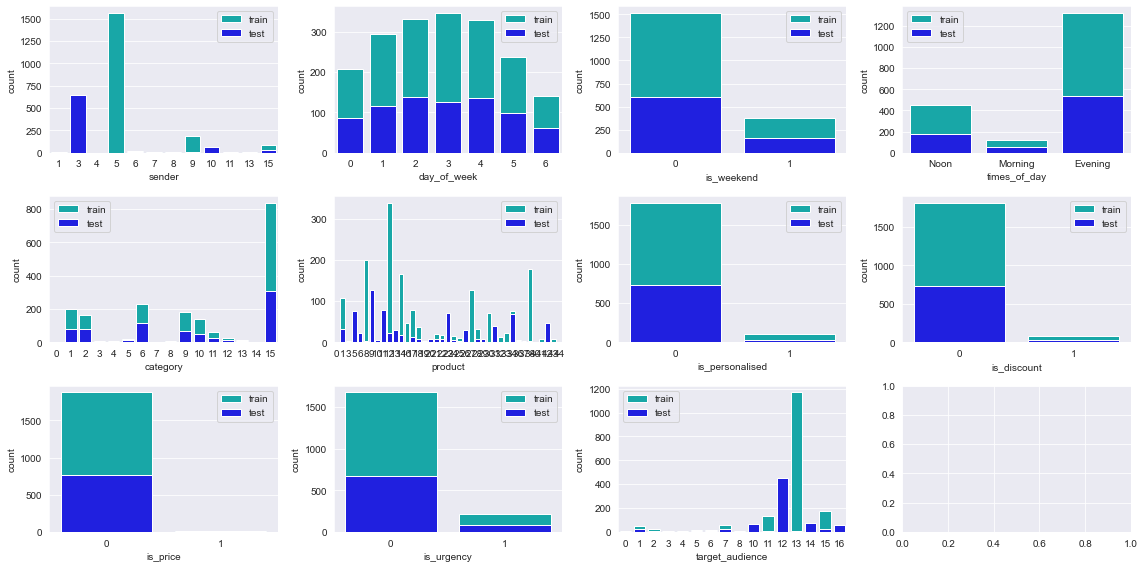

In [19]:
fig, axes = plt.subplots(3,4,figsize=(16,8))
for col, ax in zip(cat_col, axes.flat):
    sns.countplot(data=train_features[cat_col].astype('O'), x=col, color='c', label='train', ax=ax)
    sns.countplot(data=test_features[cat_col].astype('O'), x=col, color='b', label='test', ax=ax)
    ax.legend()   
plt.tight_layout()
plt.show()

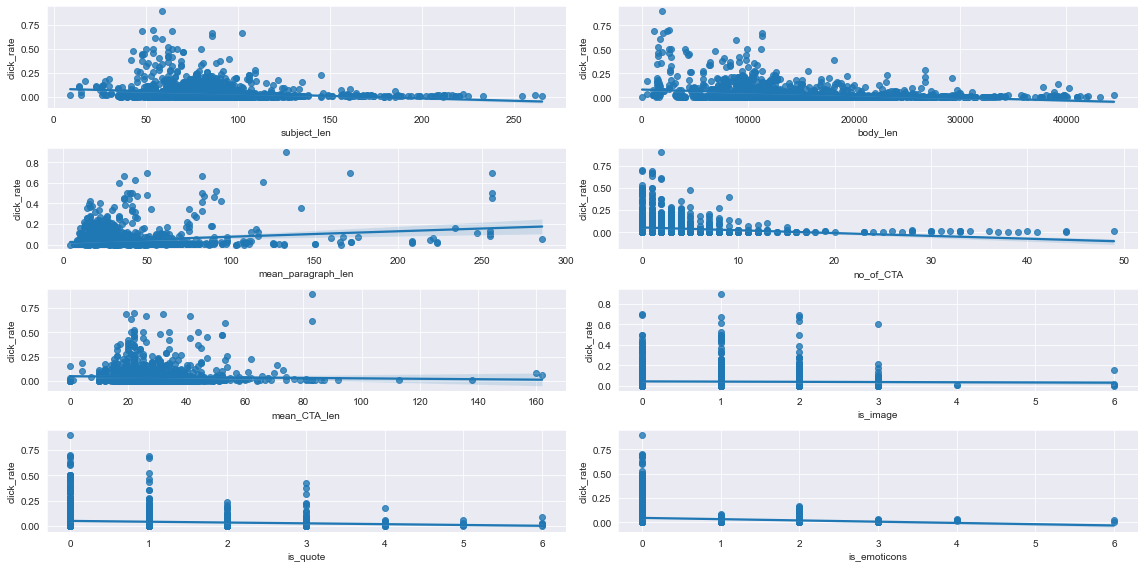

In [20]:
fig, axes = plt.subplots(4,2,figsize=(16,8))
for col, ax in zip(num_col, axes.flat):
    sns.regplot(data=train_data, x=col, y='click_rate', ax=ax)
plt.tight_layout()
plt.show()

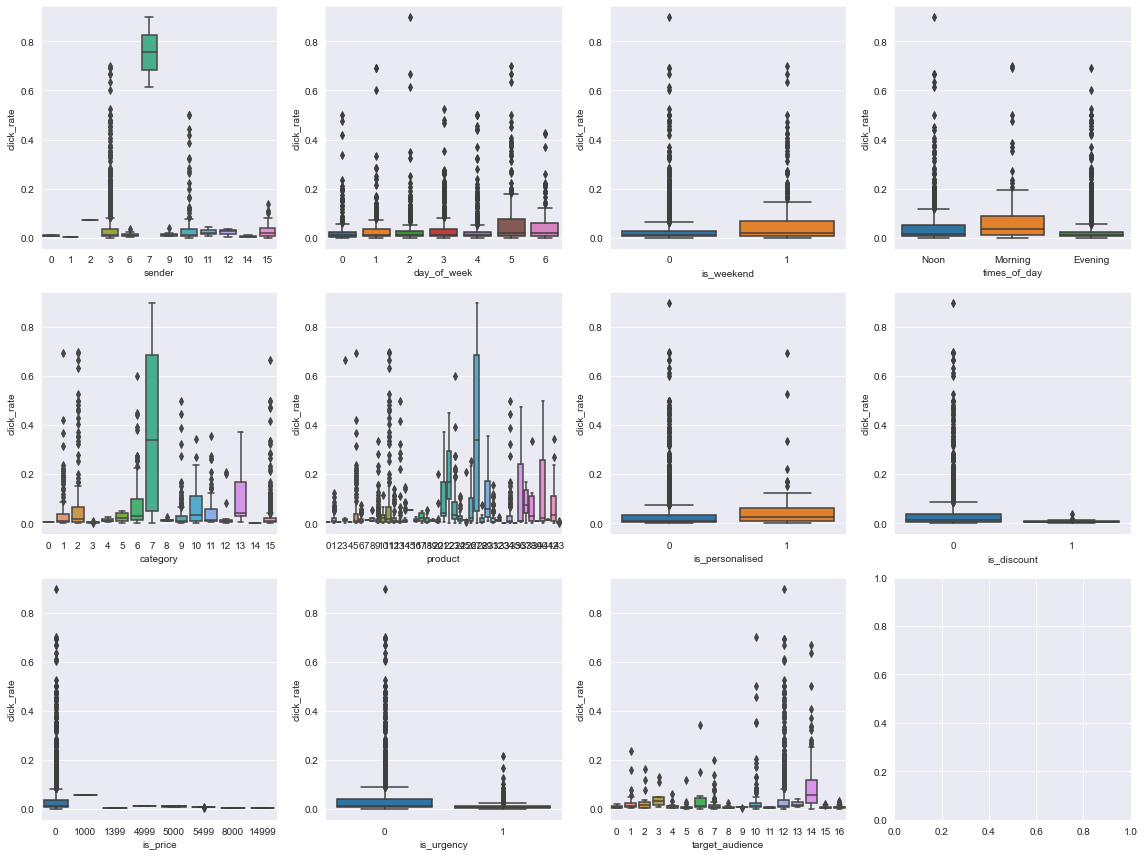

In [21]:
fig, axes = plt.subplots(3,4,figsize=(16,12))
for col, ax in zip(cat_col, axes.flat):
    sns.boxplot(data=train_data, x=col, y='click_rate', ax=ax)
plt.tight_layout()
plt.show()

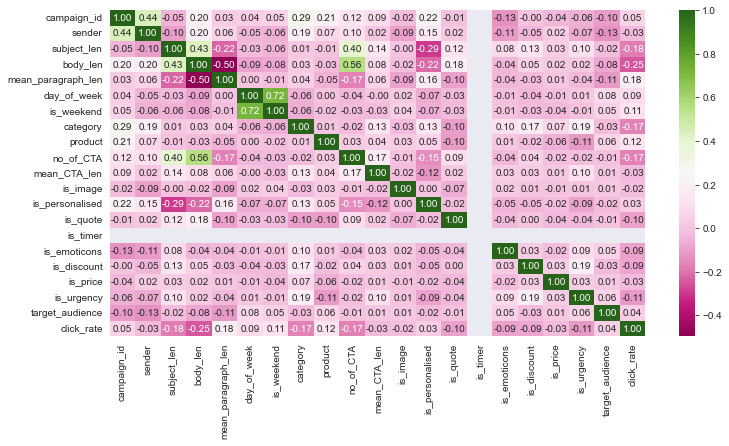

In [22]:
# Plot heatmap of correlation between numerical features

plt.figure(figsize = (12,6))
sns.heatmap(train_data.corr(), annot=True, fmt='.2f', cmap='PiYG')
plt.show()

### Step 5: Building Model

In [23]:
# Label encoding of 'time_of_day' column

train_features = train_features.replace({'Morning':0, 'Noon':1, 'Evening':2})
test_features = test_features.replace({'Morning':0, 'Noon':1, 'Evening':2})

In [24]:
# Try scaling of features

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_features_sc = pd.DataFrame(ss.fit_transform(train_features), columns = train_features.columns).reset_index(drop=True)
test_features_sc = pd.DataFrame(ss.transform(test_features), columns = test_features.columns).reset_index(drop=True)

In [25]:
# Try removing outliers

list_col = ['subject_len','body_len','mean_paragraph_len','no_of_CTA','mean_CTA_len']
train_features_out = train_features.copy()

for col in list_col:
    q1 = train_features[col].quantile(0.25)
    q3 = train_features[col].quantile(0.75)
    iqr = q3-q1
    train_features_out = train_features[(train_features[col] > q1-1.5*iqr) & (train_features[col] < q3+1.5*iqr)]
    train_target_out = train_target[(train_features[col] > q1-1.5*iqr) & (train_features[col] < q3+1.5*iqr)]

train_features_out.shape

(1820, 22)

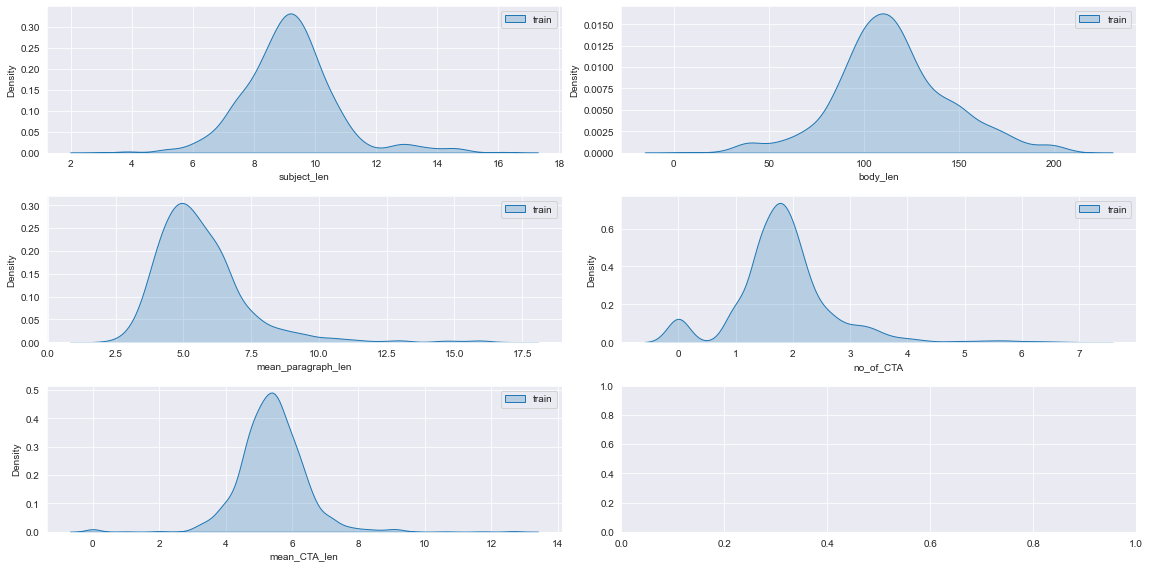

In [26]:
# Transform numerical variables to reduce skewness

# list_col = ['subject_len','body_len','mean_paragraph_len','no_of_CTA','mean_CTA_len',
#            'total_CTA_len','no_of_para','mean_CTA_by_mean_para']
train_features_tr = train_features.copy()
train_features_tr[list_col] = np.sqrt(train_features[list_col])

test_features_tr = test_features.copy()
test_features_tr[list_col] = np.sqrt(test_features[list_col])


fig, axes = plt.subplots(3,2,figsize=(16,8))
for col, ax in zip(list_col, axes.flat):
    sns.kdeplot(train_features_tr[col], shade=True, label='train', ax=ax)
    ax.legend()
plt.tight_layout()
plt.show()

In [27]:
# Adding interaction terms from polynomial features

train_features_poly = pd.concat([train_features_tr, poly_features_train], axis=1)
test_features_poly = pd.concat([test_features_tr, poly_features_test], axis=1)

In [28]:
train_features.shape

(1888, 22)

#### ML models 

In [29]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

#### Cross validation scores

In [30]:
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error

# Define function to carry out stratified k-fold cross validation (for regression)
def strat_cross_validate(estimator, train_features, train_target, scores_df):
    target_bin = pd.cut(train_target, 5, labels=[1,2,3,4,5])
    skf = StratifiedKFold(n_splits = 4, shuffle=True, random_state=10)
    scores = []
    for train_id, test_id in skf.split(train_features, target_bin):
        X_train, X_test = train_features.iloc[train_id], train_features.iloc[test_id]
        y_train, y_test = train_target.iloc[train_id], train_target.iloc[test_id]
        estimator.fit(X_train, y_train)
        y_pred = estimator.predict(X_test)
        scores.append(r2_score(y_test, y_pred))
#   print(scores)
    scores_df.loc[model, 'R2_mean'] = np.mean(scores)
    scores_df.loc[model, 'R2_std'] = np.std(scores)

In [31]:
# Comparison of different individual models

models_dict = {'LinearRegression': LinearRegression(), 'Ridge': Ridge(alpha=1), 'Lasso': Lasso(alpha=1),
               'DecisionTreeRegressor': DecisionTreeRegressor(), 'KNN': KNeighborsRegressor(n_neighbors=5), 
               'SupportVectorRegressor': SVR(C=1)}
scores_df = pd.DataFrame(columns=['R2_mean','R2_std'])

for model in models_dict:
    estimator = models_dict[model]
    strat_cross_validate(estimator, train_features_poly, train_target, scores_df)

scores_df.sort_values(by='R2_mean', ascending=False)

,R2_mean,R2_std
Ridge,0.197637,0.0704844
LinearRegression,0.197053,0.0706768
KNN,0.138249,0.0945683
Lasso,0.128823,0.0416023
DecisionTreeRegressor,0.0245449,0.106297
SupportVectorRegressor,-0.494071,0.0539485


In [32]:
# Comparison of ensemble models

models_dict = {'AdaBoostRegressor': AdaBoostRegressor(n_estimators=500), 'RandomForestRegressor': RandomForestRegressor(n_estimators=500),
               'XGBRegressor': XGBRegressor(n_estimators=500), 'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=500),
               'CatBoost': CatBoostRegressor(silent=True), 'LightGBM': LGBMRegressor()}
scores_df = pd.DataFrame(columns=['R2_mean','R2_std'])

for model in models_dict:
    estimator = models_dict[model]
    strat_cross_validate(estimator, train_features, train_target, scores_df)
    
scores_df.sort_values(by='R2_mean', ascending=False)

,R2_mean,R2_std
CatBoost,0.452183,0.0559018
RandomForestRegressor,0.444827,0.0256285
GradientBoostingRegressor,0.435881,0.0370282
LightGBM,0.405198,0.0546029
XGBRegressor,0.367465,0.059798
AdaBoostRegressor,-0.349519,0.460869


### FEATURE REDUCTION

In [33]:
estimator = CatBoostRegressor(silent=True)
estimator.fit(train_features, train_target)
feat_imp = pd.DataFrame({'features': train_features.columns, 'importance': estimator.feature_importances_})
feat_imp = feat_imp.sort_values(by='importance', ascending=False)
feat_imp

,features,importance
2,body_len,16.972947
19,total_CTA_len,14.115422
1,subject_len,8.204418
7,category,7.806527
21,mean_CTA_by_mean_para,7.504081
10,mean_CTA_len,7.127933
8,product,5.502688
20,no_of_para,5.476993
3,mean_paragraph_len,4.700391
18,target_audience,4.626869


In [34]:
train_features_imp = train_features[feat_imp.features[:13]]
test_features_imp = test_features[feat_imp.features[:13]]

estimator.fit(train_features_imp, train_target)
train_predict = estimator.predict(train_features_imp)
test_predict = estimator.predict(test_features_imp)

In [35]:
print('Explained variance =', explained_variance_score(train_target, train_predict))
print('R squared =', r2_score(train_target, train_predict))
print('RMSE =', np.sqrt(mean_squared_error(train_target, train_predict)))

Explained variance = 0.9410943927801589
R squared = 0.9410940435866377
RMSE = 0.02043591678721098


In [36]:
# Perform RFE to identify best set of features

from sklearn.feature_selection import RFE
score_card = pd.DataFrame(columns = ['R2 score'])

for i in range(1,train_features.shape[1]+1):
    rfe = RFE(estimator=estimator,n_features_to_select=i)
    rfe_model = rfe.fit(train_features,train_target)
    best_features = train_features.columns[rfe_model.support_]
    model = estimator.fit(train_features[best_features],train_target)    
    count = len(best_features)    
    train_pred_rfe = model.predict(train_features[best_features])
    score_card.loc[count,'R2 score'] = r2_score(train_target, train_pred_rfe)
    score_card.loc[count,'features'] = list(best_features.values)
score_card

,R2 score,features
1,0.347778,body_len
2,0.700028,"[body_len, total_CTA_len]"
3,0.828012,"[body_len, total_CTA_len, mean_CTA_by_mean_para]"
4,0.871167,"[body_len, category, total_CTA_len, mean_CTA_b..."
5,0.894261,"[subject_len, body_len, category, total_CTA_le..."
6,0.897829,"[subject_len, body_len, category, mean_CTA_len..."
7,0.918331,"[subject_len, body_len, mean_paragraph_len, ca..."
8,0.923301,"[subject_len, body_len, mean_paragraph_len, ca..."
9,0.924563,"[subject_len, body_len, mean_paragraph_len, ca..."
10,0.932735,"[subject_len, body_len, mean_paragraph_len, ca..."


In [37]:
rfe_model=RFE(estimator=CatBoostRegressor(silent=True),n_features_to_select=12)
rfe_model=rfe_model.fit(train_features,train_target)

models_dict = {'CatBoost RFE': rfe_model}
scores_df = pd.DataFrame(columns=['R2_mean','R2_std'])
for model in models_dict:
    estimator = models_dict[model]
    strat_cross_validate(models_dict[model], train_features, train_target, scores_df)
scores_df

# R2 score is almost unchanged while the variation has come down

,R2_mean,R2_std
CatBoost RFE,0.429423,0.0730061


### Stacking/Voting Ensembles

In [38]:
# Stacking model

target_bin = pd.cut(train_target, 5, labels=[1,2,3,4,5])
kf = KFold(n_splits = 4, shuffle=True, random_state=10)

from sklearn.ensemble import StackingRegressor
base_models = [('RandomForestRegressor', RandomForestRegressor(n_estimators=500)),
               ('CatBoostRegressor',CatBoostRegressor(silent=True)),
               ('XGBRegressor', XGBRegressor(n_estimators=500)),
               ('GradientBoostingRegressor', GradientBoostingRegressor(n_estimators=500)),
               ('LightGBM', LGBMRegressor())]
  
stacked = StackingRegressor(estimators = base_models, final_estimator = RandomForestRegressor(), cv = kf)

In [39]:
# Voting model

from sklearn.ensemble import VotingRegressor
base_models = [('RandomForestRegressor', RandomForestRegressor(n_estimators=500)),
               ('CatBoostRegressor',CatBoostRegressor(silent=True)), 
               ('XGBRegressor', XGBRegressor(n_estimators=500)),
               ('GradientBoostingRegressor', GradientBoostingRegressor(n_estimators=500)),
               ('LightGBM', LGBMRegressor())]
voting = VotingRegressor(estimators = base_models)

models_dict = {'Stacking Regressor': stacked, 'Voting Regressor': voting}
scores_df = pd.DataFrame(columns=['R2_mean','R2_std'])
for model in models_dict:
    estimator = models_dict[model]
    strat_cross_validate(models_dict[model], train_features, train_target, scores_df)
scores_df

,R2_mean,R2_std
Stacking Regressor,0.373324,0.0503009
Voting Regressor,0.457309,0.0396151


In [40]:
# Fit the best model & calculate test scores to submit

estimator = voting
estimator.fit(train_features, train_target)              
train_predict = estimator.predict(train_features)
test_predict = estimator.predict(test_features)

print('Explained variance =', explained_variance_score(train_target, train_predict))
print('R squared =', r2_score(train_target, train_predict))
print('RMSE =', np.sqrt(mean_squared_error(train_target, train_predict)))

Explained variance = 0.9575839138967792
R squared = 0.9575797017049799
RMSE = 0.017342087726586856


In [41]:
test_target = pd.DataFrame({'campaign_id':test_data['campaign_id'], 'click_rate':test_predict})
test_target.to_csv('Submission 1.csv', index=False)

### FINE TUNING HYPERPARAMETERS

In [44]:
from sklearn.model_selection import GridSearchCV
kf = KFold(n_splits = 3, shuffle=True)

# params = {'col_samplesbytree': [0.6,0.7,0.8,0.9,1],
#          'sub_sample': [0.6,0.7,0.8,0.9,1],
#          'learning_rate': [0.01,0.1,0.5,1],
#          'max_depth': [10,20,30,40,50,60,None]}

# params = {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, None],
#  'max_features': [0.5,0.6,0.7,0.8,0.9,None],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'max_samples': [0.5,0.6,0.7,0.8,0.9,1]}

params = {'max_depth':[3,5,10,15,20,25,30],
          'learning_rate':[0.01,0.1,0.2,0.3]}

gb_reg = GradientBoostingRegressor(n_estimators=500)
grid = GridSearchCV(gb_reg, param_grid=params, scoring='r2', cv=kf, n_jobs=-1, verbose=10)
grid.fit(train_features_tr, train_target)
print(grid.best_score_)
grid.best_params_

Fitting 3 folds for each of 28 candidates, totalling 84 fits
0.4406096954307401


{'learning_rate': 0.1, 'max_depth': 3}

In [45]:
# grid.cv_results_

best_params_rf = {'bootstrap': True, 'max_depth': 60, 'max_features': 0.5, 'max_samples': 0.9, 'min_samples_leaf': 1, 'min_samples_split': 2}
best_params_xgb = {'col_samplesbytree': 0.6, 'learning_rate': 0.1, 'max_depth': 20, 'sub_sample': 0.6}
best_params_cat = {'depth': 10, 'learning_rate': 0.2,'l2_leaf_reg': 10}
best_params_lgbm = {'max_depth': 30, 'learning_rate': 0.3}
best_params_gb = {'max_depth': 3, 'learning_rate': 0.1}

In [47]:
# Create fine-tuned models for each & voting regressor based on finetuned version

rf_reg_best = RandomForestRegressor(n_estimators=500, **best_params_rf)
xgb_reg_best = XGBRegressor(n_estimators=500, **best_params_xgb, verbosity=0)
catboost_best = CatBoostRegressor(**best_params_cat, silent=True)
lgbm_best = LGBMRegressor(**best_params_lgbm)
gb_reg_best = GradientBoostingRegressor(n_estimators=500, **best_params_gb)

base_models = [('RandomForestRegressor', rf_reg_best),
               ('XGBRegressor', xgb_reg_best),
               ('CatBoost',CatBoostRegressor(silent=True)),
               ('LGBM', LGBMRegressor()),
               ('GradientBoostingRegressor',gb_reg_best)]
voting_best = VotingRegressor(estimators = base_models)

In [48]:
models_dict = {'RF Finetuned': rf_reg_best, 'XGB Finetuned': xgb_reg_best, 'CatBoost Finetuned': catboost_best,
               'LGBM Finetuned': lgbm_best, 'GradientBoost Finetuned': gb_reg_best, 'Voting Best': voting_best}
scores_df = pd.DataFrame(columns=['R2_mean','R2_std'])
for model in models_dict:
    estimator = models_dict[model]
    strat_cross_validate(models_dict[model], train_features, train_target, scores_df)
scores_df

,R2_mean,R2_std
RF Finetuned,0.446092,0.0345188
XGB Finetuned,0.404559,0.0472735
CatBoost Finetuned,0.432131,0.0582867
LGBM Finetuned,0.378281,0.066121
GradientBoost Finetuned,0.426254,0.0379387
Voting Best,0.466708,0.0442974


In [49]:
# Fit the best model & calculate test scores to submit

estimator = voting_best
estimator.fit(train_features, train_target)              
train_predict = estimator.predict(train_features)
test_predict = estimator.predict(test_features)

print('Explained variance =', explained_variance_score(train_target, train_predict))
print('R squared =', r2_score(train_target, train_predict))
print('RMSE =', np.sqrt(mean_squared_error(train_target, train_predict)))

Explained variance = 0.956653210269133
R squared = 0.9566488681806656
RMSE = 0.01753132496707301


In [50]:
test_target = pd.DataFrame({'campaign_id':test_data['campaign_id'], 'click_rate':test_predict})
test_target.to_csv('Final Submission.csv', index=False)

In [ ]:
# Neural network model

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from scikeras.wrappers import KerasRegressor

# def baseline_model():
#     # create model
#     model = Sequential()
#     model.add(Dense(19, input_shape=(19,), kernel_initializer='normal', activation='relu'))
#     model.add(Dense(10, kernel_initializer='normal', activation='relu'))
#     model.add(Dense(10, kernel_initializer='normal', activation='relu'))
#     model.add(Dense(1, kernel_initializer='normal'))
#     # Compile model
#     model.compile(loss='mean_squared_error', optimizer='adam')
#     return model

In [ ]:
# estimator = KerasRegressor(model=baseline_model, epochs=100, batch_size=5, verbose=0)
# kf = KFold(n_splits=5, shuffle=True)
# results = cross_val_score(estimator, train_features_sc, train_target, cv=kf, scoring='r2', n_jobs=-1, verbose=2)
# results.mean()